# Data Analysis on FIFA 21 Dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import plotly.graph_objs as go

import warnings                                             
warnings.filterwarnings('ignore')

# Data Profiling

In [36]:
df = pd.read_csv('./fifa21 raw data v2.csv')

df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [37]:
print(df.shape)

(18979, 77)


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [39]:
print(df.describe())


                  ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min

In [40]:
print(df.isna())

          ID   Name  LongName  photoUrl  playerUrl  Nationality    Age   ↓OVA  \
0      False  False     False     False      False        False  False  False   
1      False  False     False     False      False        False  False  False   
2      False  False     False     False      False        False  False  False   
3      False  False     False     False      False        False  False  False   
4      False  False     False     False      False        False  False  False   
...      ...    ...       ...       ...        ...          ...    ...    ...   
18974  False  False     False     False      False        False  False  False   
18975  False  False     False     False      False        False  False  False   
18976  False  False     False     False      False        False  False  False   
18977  False  False     False     False      False        False  False  False   
18978  False  False     False     False      False        False  False  False   

         POT   Club  ...   

# Drop Columns
- playerurl 
- playerphoto 
- bov  
- hits 

In [41]:
#playerurl playerphoto bov hits
df.drop(columns=['photoUrl','playerUrl','BOV','Hits'],axis=1,inplace=True)
df.head()

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,4★,Medium,Low,5 ★,85,92,91,95,38,65
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,5★,High,Low,5 ★,89,93,81,89,35,77
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,1★,Medium,Medium,3 ★,87,92,78,90,52,90
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,4★,High,High,4 ★,76,86,93,88,64,78
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,5★,High,Medium,5 ★,91,85,86,94,36,59


# Convert The Numeric Data from str to int


### Cleaning Clubs names by removing \n

In [42]:
df['Club']

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
18974             \n\n\n\nWuhan Zall
18975        \n\n\n\nOldham Athletic
18976             \n\n\n\nDerry City
18977       \n\n\n\nDalian YiFang FC
18978       \n\n\n\nDalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [43]:
df["Club"] = df["Club"].map(lambda x: x.replace("\n", ""))
df['Club']

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

### Converting Value , Wage and Release Clause to numerical format

In [44]:
df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M
...,...,...,...
18974,€100K,€1K,€70K
18975,€130K,€500,€165K
18976,€120K,€500,€131K
18977,€100K,€2K,€88K


In [45]:
import re
columns_to_clean = ['Value', 'Wage', 'Release Clause']

print(df[columns_to_clean])

def clean_and_convert(value):
    value = value.replace('€', '')
    if 'M' in value:
        value = float(re.sub(r'[^\d.]', '', value)) * 1_000_000
    elif 'K' in value:
        value = float(re.sub(r'[^\d.]', '', value)) * 1_000
    return int(value)

columns_to_clean = ['Value', 'Wage', 'Release Clause']
df[columns_to_clean] = df[columns_to_clean].applymap(clean_and_convert)

df[columns_to_clean] = df[columns_to_clean].replace({',': ''}, regex=True)

df[columns_to_clean] = df[columns_to_clean].apply(pd.to_numeric, errors='coerce')

print(df[columns_to_clean])










         Value   Wage Release Clause
0      €103.5M  €560K        €138.4M
1         €63M  €220K         €75.9M
2        €120M  €125K        €159.4M
3        €129M  €370K          €161M
4        €132M  €270K        €166.5M
...        ...    ...            ...
18974    €100K    €1K           €70K
18975    €130K   €500          €165K
18976    €120K   €500          €131K
18977    €100K    €2K           €88K
18978    €100K    €1K           €79K

[18979 rows x 3 columns]
           Value    Wage  Release Clause
0      103500000  560000       138400000
1       63000000  220000        75900000
2      120000000  125000       159400000
3      129000000  370000       161000000
4      132000000  270000       166500000
...          ...     ...             ...
18974     100000    1000           70000
18975     130000     500          165000
18976     120000     500          131000
18977     100000    2000           88000
18978     100000    1000           79000

[18979 rows x 3 columns]


### Funcation to convert the inches to cm


In [46]:
def fi_to_cm(feet_inches_str):
    feet_inches_str=feet_inches_str.replace('"','')
    feet, inches = map(int,feet_inches_str.split("'"))
    total_inches = (feet * 12) + inches
    centimeters = total_inches * 2.54
    
    return int(centimeters)

###  Convert the Height column


In [47]:
warnings.simplefilter('ignore')
for i in range(len(df)):
    he=df['Height'][i].replace('cm','')
    df['Height'][i]=he
    if len(df['Height'][i]) >3:
        fi=fi_to_cm(df['Height'][i])
        df['Height'][i]=str(fi)

In [48]:
hei=pd.Series(df['Height'].value_counts())
hei.index

Index(['180', '178', '185', '183', '175', '188', '182', '184', '186', '177',
       '187', '181', '176', '179', '173', '190', '174', '170', '191', '189',
       '172', '193', '192', '171', '168', '169', '194', '196', '195', '167',
       '165', '166', '197', '198', '164', '163', '199', '162', '201', '200',
       '160', '161', '202', '158', '203', '159', '157', '156', '206', '155'],
      dtype='object', name='Height')

In [49]:
hei=pd.Series(df['Weight'].value_counts())
hei.index

Index(['70kg', '75kg', '80kg', '72kg', '78kg', '74kg', '73kg', '77kg', '76kg',
       '68kg', '79kg', '71kg', '82kg', '69kg', '65kg', '81kg', '83kg', '67kg',
       '84kg', '85kg', '66kg', '64kg', '86kg', '88kg', '63kg', '87kg', '62kg',
       '90kg', '60kg', '89kg', '61kg', '91kg', '92kg', '93kg', '58kg', '59kg',
       '94kg', '95kg', '57kg', '55kg', '96kg', '98kg', '56kg', '97kg', '100kg',
       '54kg', '170lbs', '103kg', '172lbs', '101kg', '102kg', '99kg', '104kg',
       '179lbs', '183lbs', '196lbs', '181lbs', '52kg', '159lbs', '148lbs',
       '161lbs', '168lbs', '165lbs', '107kg', '110kg', '53kg', '50kg',
       '176lbs', '163lbs', '185lbs', '154lbs', '139lbs', '192lbs', '174lbs',
       '190lbs', '130lbs', '146lbs', '203lbs', '157lbs'],
      dtype='object', name='Weight')

In [50]:
kk=lambda x: int(x*0.45359237)
for i in range(len(df)):
    kg=df['Weight'][i].replace('kg','')
    df['Weight'][i]=kg
    if len(df['Weight'][i])>3:
        lbs=df['Weight'][i].replace('lbs','')        
        df['Weight'][i]=str(kk(int(lbs)))

In [51]:
df['Height']=df['Height'].astype('int64')
df['Weight']=df['Weight'].astype('int64')

df

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,4★,Medium,Low,5 ★,85,92,91,95,38,65
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,5★,High,Low,5 ★,89,93,81,89,35,77
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,1★,Medium,Medium,3 ★,87,92,78,90,52,90
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,4★,High,High,4 ★,76,86,93,88,64,78
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,5★,High,Medium,5 ★,91,85,86,94,36,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,...,2★,Medium,Medium,1 ★,64,28,26,38,48,51
18975,258760,B. Hough,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,...,2★,Medium,Medium,1 ★,64,40,48,49,35,45
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,...,2★,Medium,Medium,1 ★,63,39,44,46,40,53
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,...,2★,Medium,Medium,1 ★,58,49,41,49,30,44


### Cleaning Contracts column

In [52]:
# Clean contract period


def get_contract(row):
    if 'On Loan' in row['Contract']:
        date_format = "%b %d, %Y"  
        date_start = datetime.strptime(row['Joined'], date_format)
        date_end = datetime.strptime(row['Loan Date End'], date_format)
        cont_range = date_end - date_start
        period = cont_range.days // 365  
    elif 'Free' in row['Contract']:
        period = 0
    else:
        start_year, end_year = row['Contract'].split(" ~ ")
        start_year = int(start_year)
        end_year = int(end_year)
        period = end_year - start_year
    return period

df['Contract'] = df.apply(get_contract, axis=1)

df

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,17,"RW, ST, CF",...,4★,Medium,Low,5 ★,85,92,91,95,38,65
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,4,"ST, LW",...,5★,High,Low,5 ★,89,93,81,89,35,77
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,9,GK,...,1★,Medium,Medium,3 ★,87,92,78,90,52,90
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,8,"CAM, CM",...,4★,High,High,4 ★,76,86,93,88,64,78
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,5,"LW, CAM",...,5★,High,Medium,5 ★,91,85,86,94,36,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,Wuhan Zall,4,CB,...,2★,Medium,Medium,1 ★,64,28,26,38,48,51
18975,258760,B. Hough,Ben Hough,England,17,47,67,Oldham Athletic,1,CM,...,2★,Medium,Medium,1 ★,64,40,48,49,35,45
18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,Derry City,1,CM,...,2★,Medium,Medium,1 ★,63,39,44,46,40,53
18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2,RW,...,2★,Medium,Medium,1 ★,58,49,41,49,30,44


### Cleaning Ratings Column

In [53]:
# Clean ratings

def clean_rating_star(rating_str):
    rating_str = rating_str.replace("★", "")
    rating = int(rating_str)
    return rating

def clean_rating_level(rating_str):
    if 'High' in rating_str:
        rating = 3
    elif 'Medium' in rating_str:
        rating = 2
    else:
        rating = 1
    return rating

df['W/F'] = df['W/F'].apply(clean_rating_star)
df['SM'] = df['SM'].apply(clean_rating_star)
df['IR'] = df['IR'].apply(clean_rating_star)

df['A/W'] = df['A/W'].apply(clean_rating_level)
df['D/W'] = df['D/W'].apply(clean_rating_level)


df[['W/F','SM']]

,W/F,SM
0,4,4
1,4,5
2,3,1
3,5,4
4,5,5
...,...,...
18974,2,2
18975,2,2
18976,2,2
18977,3,2


### Data after cleaning

In [54]:
df.head()

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,17,"RW, ST, CF",...,4,2,1,5,85,92,91,95,38,65
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,4,"ST, LW",...,5,3,1,5,89,93,81,89,35,77
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,9,GK,...,1,2,2,3,87,92,78,90,52,90
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,8,"CAM, CM",...,4,3,3,4,76,86,93,88,64,78
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,5,"LW, CAM",...,5,3,2,5,91,85,86,94,36,59


In [55]:
df.shape

(18979, 73)

In [56]:
df.describe()

,ID,Age,↓OVA,POT,Contract,Height,Weight,Value,Wage,Release Clause,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,3.635334,181.199220,75.018494,2.865063e+06,9092.062279,3.962951e+06,...,2.364982,2.226461,2.082776,1.091628,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,2.300017,6.840033,7.073402,7.685154e+06,19707.021089,9.772762e+06,...,0.766114,0.528694,0.507762,0.361760,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,0.000000,155.000000,50.000000,0.000000e+00,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,2.000000,176.000000,70.000000,4.750000e+05,1000.000000,4.235000e+05,...,2.000000,2.000000,2.000000,1.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,3.000000,181.000000,75.000000,9.500000e+05,3000.000000,1.000000e+06,...,2.000000,2.000000,2.000000,1.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,5.000000,186.000000,80.000000,2.000000e+06,8000.000000,2.800000e+06,...,3.000000,3.000000,2.000000,1.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,23.000000,206.000000,110.000000,1.855000e+08,560000.000000,2.031000e+08,...,5.000000,3.000000,3.000000,5.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [57]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Age               18979 non-null  int64 
 5   ↓OVA              18979 non-null  int64 
 6   POT               18979 non-null  int64 
 7   Club              18979 non-null  object
 8   Contract          18979 non-null  int64 
 9   Positions         18979 non-null  object
 10  Height            18979 non-null  int64 
 11  Weight            18979 non-null  int64 
 12  Preferred Foot    18979 non-null  object
 13  Best Position     18979 non-null  object
 14  Joined            18979 non-null  object
 15  Loan Date End     1013 non-null   object
 16  Value             18979 non-null  int64 
 17  Wage        

# Data Visualizations

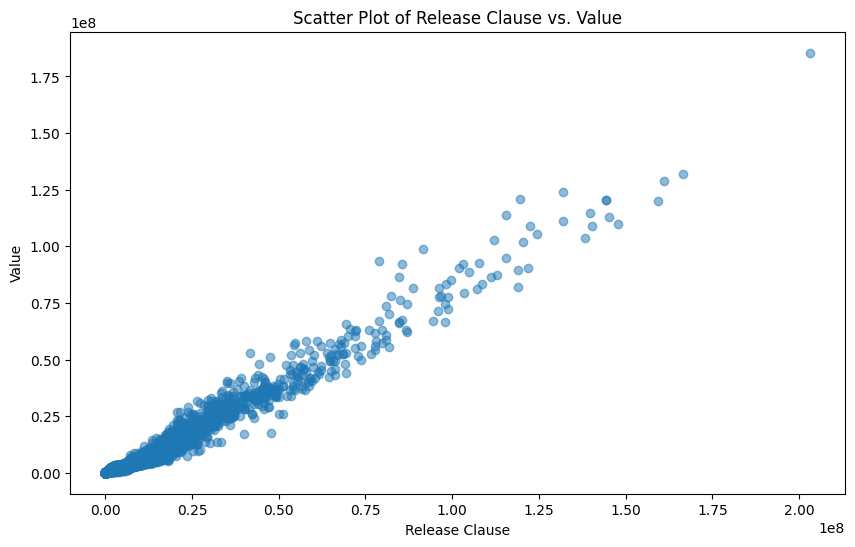

In [59]:

df_releaseClause = df[df['Release Clause']!=0]
plt.figure(figsize=(10, 6))
plt.scatter(df_releaseClause['Release Clause'], df_releaseClause['Value'], alpha=0.5)
plt.xlabel('Release Clause')
plt.ylabel('Value')
plt.title('Scatter Plot of Release Clause vs. Value')
plt.show()

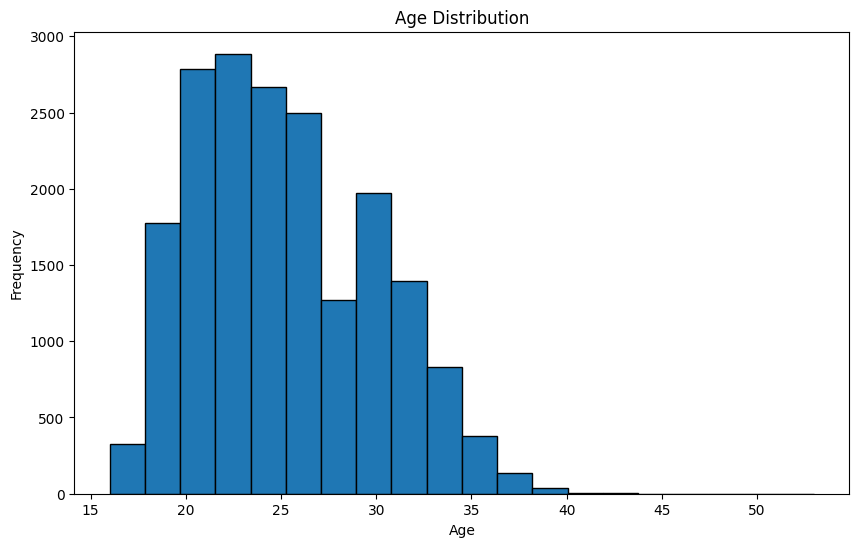

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

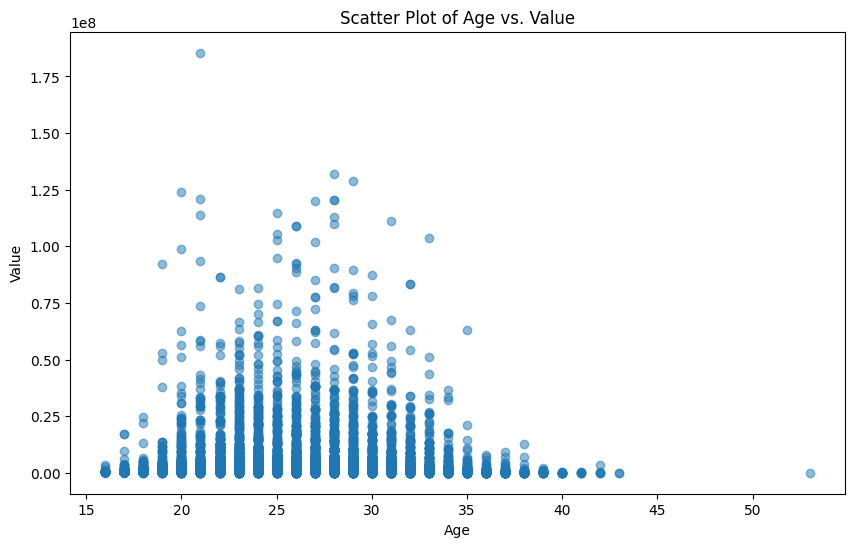

In [61]:
# Example code for a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Value'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Scatter Plot of Age vs. Value')
plt.show()

In [62]:
club_values = df.groupby('Club')['Value'].sum()

# Sort the clubs in descending order of total value
top_10_clubs = club_values.sort_values(ascending=False).head(10)

# Display the top 10 clubs with the highest valued players
print(top_10_clubs)



Club
Liverpool              1276325000
Manchester City        1187650000
Real Madrid            1187275000
FC Barcelona            969000000
Paris Saint-Germain     961600000
FC Bayern München       945499999
Manchester United       894880000
Chelsea                 888625000
Tottenham Hotspur       868550000
Atlético Madrid         830300000
Name: Value, dtype: int64


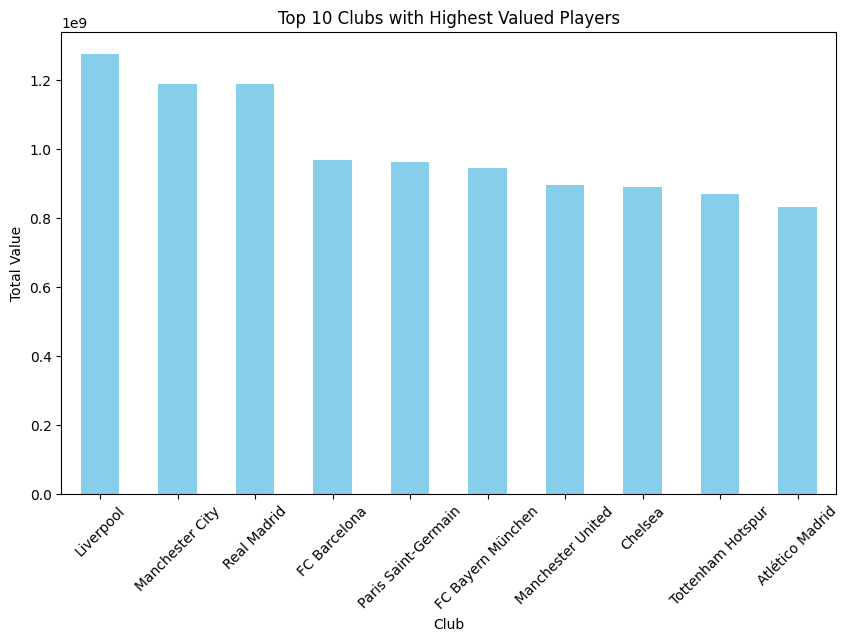

In [63]:

# Create a bar plot for the top 10 clubs
plt.figure(figsize=(10, 6))
top_10_clubs.plot(kind='bar', color='skyblue')
plt.xlabel('Club')
plt.ylabel('Total Value')
plt.title('Top 10 Clubs with Highest Valued Players')
plt.xticks(rotation=45)
plt.show()

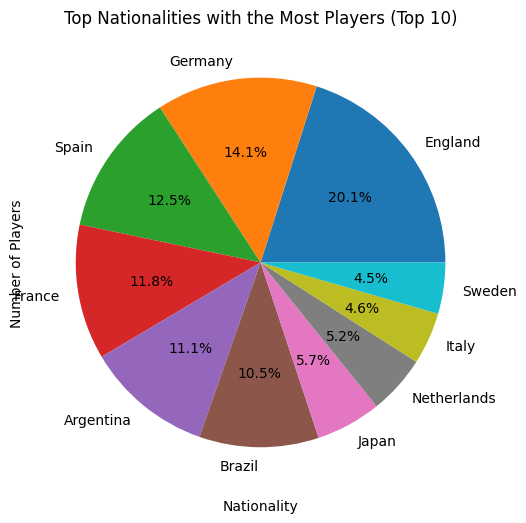

In [74]:
# Count the number of players from each nationality
nationality_counts = df['Nationality'].value_counts()

# Select the top N nationalities (e.g., top 10) for better visualization
top_nationalities = nationality_counts.head(10)

# Create a bar plot or countplot for the top N nationalities
plt.figure(figsize=(12, 6))
plt.pie(x=top_nationalities,labels=top_nationalities.index,autopct='%1.1f%%')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top Nationalities with the Most Players (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [65]:
df_heatmap = df.select_dtypes(include=['number']).drop('ID', axis=1)

corr_matrix = df_heatmap.corr().abs()


# Create a heatmap with hover information
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    hovertext=corr_matrix.values,  # Specify the hovertext
    hoverinfo= 'all',  # Customize the hover information
    colorscale='Viridis'
)

layout = go.Layout(
    title='Correlation Heatmap',
    xaxis=dict(tickangle=-45),
    width=800,  # Set the width of the figure
    height=800  # Set the height of the figure
)

fig = go.Figure(data=[heatmap], layout=layout)

# Show the heatmap
fig.show()

In [66]:
frequency_count = df.groupby('Nationality').size().reset_index(name='Count')
frequency_count['Country'] = frequency_count['Nationality']

fig = px.choropleth(frequency_count, locations='Country', locationmode='country names', color='Count',
                    title='Nationality Counts', color_continuous_scale='Viridis')

fig.show() 


In [67]:
df_contract = df.sort_values(by='Contract', ascending=False)

top_ten_contracts = df_contract.head(10)

fig = px.bar(top_ten_contracts, x='Contract', y='Name',
             labels={'Name': 'Player Name', 'Contract': 'Contract Length (Years)'},
             title='Top Ten Longest Player Contracts')
fig.update_layout(xaxis_categoryorder='total ascending')  

fig.show()

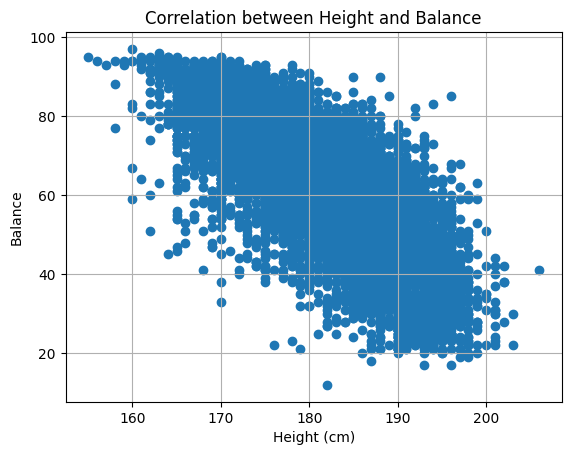

In [68]:
plt.scatter(df['Height'], df['Balance'])
plt.xlabel('Height (cm)')
plt.ylabel('Balance')
plt.title('Correlation between Height and Balance')
plt.grid(True)
plt.show()